In [1]:
%load_ext autoreload
%autoreload 2

import joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from generate_perturbation import pipeline
from extract_image_mask import create_mask
import matplotlib.pyplot as plt
from pytorchyolo.models import load_model

Loaded model from ./ptlabel_best_model.pth


In [2]:
def tensor_to_image(image):
    return np.transpose(image.detach().cpu().squeeze().numpy(), (1, 2, 0))

In [3]:
random_state = 100

img_path = "D:\\Janjan Chua\\Downloads\\crop_137011530_224204039252871_285536428304464810_n.jpg"
CHOSEN_COLOR_SPACE = "LAB" #TODO: <-- pick a colorspace
CHOSEN_REGION = "bbox"  #TODO: <-- pick the region where the feature is extracted
CHOSEN_LABEL = "e_bbox_yf" #TODO: <-- pick a label
eps_model = joblib.load("model_dumps/mpr_tunedfs_bo_LAB_bbox_e_bbox_yf.pkl")

CSV_FILENAME = "DROPPEDWITHATTRIBUTESNULL_recompiled_features_updated_yunet_pixels_bg_pixels_fixlbbox.csv" #<-- update csv name
df_features = pd.read_csv(CSV_FILENAME)
train_set, test_set = train_test_split(df_features, test_size = 0.2, random_state=random_state)

Face 0
['w', 'h', 'x', 'y', 'L_LAB_BIN_bbox_0', 'L_LAB_BIN_bbox_1', 'L_LAB_BIN_bbox_2', 'L_LAB_BIN_bbox_3', 'L_LAB_BIN_bbox_4', 'L_LAB_BIN_bbox_5', 'L_LAB_BIN_bbox_6', 'L_LAB_BIN_bbox_7', 'L_LAB_BIN_bbox_8', 'L_LAB_BIN_bbox_9', 'L_LAB_BIN_bbox_10', 'L_LAB_BIN_bbox_11', 'L_LAB_BIN_bbox_12', 'L_LAB_BIN_bbox_13', 'L_LAB_BIN_bbox_14', 'L_LAB_BIN_bbox_15', 'L_LAB_BIN_bbox_16', 'L_LAB_BIN_bbox_17', 'L_LAB_BIN_bbox_18', 'L_LAB_BIN_bbox_19', 'L_LAB_BIN_bbox_20', 'L_LAB_BIN_bbox_21', 'L_LAB_BIN_bbox_22', 'L_LAB_BIN_bbox_23', 'L_LAB_BIN_bbox_24', 'L_LAB_BIN_bbox_25', 'A_LAB_BIN_bbox_0', 'A_LAB_BIN_bbox_1', 'A_LAB_BIN_bbox_2', 'A_LAB_BIN_bbox_3', 'A_LAB_BIN_bbox_4', 'A_LAB_BIN_bbox_5', 'A_LAB_BIN_bbox_6', 'A_LAB_BIN_bbox_7', 'A_LAB_BIN_bbox_8', 'A_LAB_BIN_bbox_9', 'A_LAB_BIN_bbox_10', 'A_LAB_BIN_bbox_11', 'A_LAB_BIN_bbox_12', 'A_LAB_BIN_bbox_13', 'A_LAB_BIN_bbox_14', 'A_LAB_BIN_bbox_15', 'A_LAB_BIN_bbox_16', 'A_LAB_BIN_bbox_17', 'A_LAB_BIN_bbox_18', 'A_LAB_BIN_bbox_19', 'A_LAB_BIN_bbox_20', 'A_LA

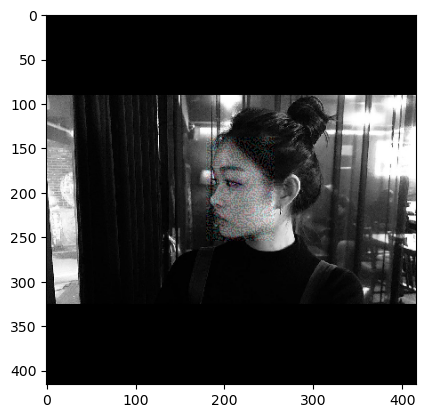

In [4]:
# create_mask(img_path)
# extract_region - 0 mask, 1 bbox
# perturb_region - 0 - mask, 1 - bbox, 2-lbbox)
image = pipeline(img_path, eps_model, CHOSEN_COLOR_SPACE, CHOSEN_REGION, 1)
image = tensor_to_image(image)
plt.imshow(image)

In [5]:
# #TODO: load model here (edit this whole cell as necessary, idk paano magproperly load from joblib)
# random_state = 100

# import joblib
# from sklearn.base import clone as clone_model

# labels = {"mask": "e_bbox_yf", "bbox": "e_face_yf"}

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# categorical_columns = df_features.select_dtypes(include=[bool, object]).columns
# encoded_columns = df_features[categorical_columns].apply(encoder.fit_transform)

# df_encoded_features = df_features.copy()
# df_encoded_features[categorical_columns] = encoded_columns

# def get_features_and_label(color_space, region):
#     features = ["w", "h", "x", "y"]
#     for color_channel in color_channels[color_space]: 
#         features += [color_channel + region + "_" + str(i) for i in range(26)]
#     features += ["LBP_BIN_" + region + "_" + str(i) for i in range(26)]
#     features += ["SOBELX_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBELY_BIN_" + region + "_" + str(i) for i in range(20)]
#     features += ["SOBEL_BIN_" + region + "_" + str(i) for i in range(20)]
#     return features, labels[region]

# from sklearn.model_selection import train_test_split
# features, _ = get_features_and_label(CHOSEN_COLOR_SPACE, CHOSEN_REGION)
# label = "e_bbox_yf"

# X_features =  df_encoded_features.loc[:,  features]
# y_features = df_encoded_features.loc[:, label].values #<-- pick label

# X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size = 0.2, random_state=random_state)